In [3]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#read data into a dataframe
data=pd.read_csv(r"E:\Imarticus_R_Project\Imarticus_DSP_29\Advertising.csv",index_col=0,header=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
print(data.dtypes)
print(data.shape)
print(data.describe()) #kind of summary as we learnt in R

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


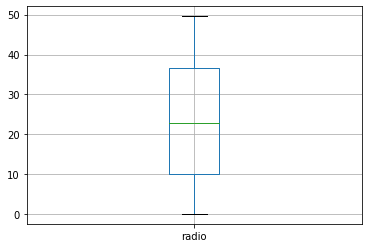

In [8]:
data.boxplot(column="radio")

In [9]:
X=data[['TV','radio','newspaper']]
Y=data['sales']

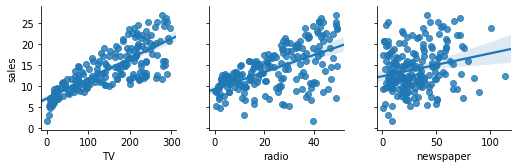

In [10]:
sns.pairplot(data,x_vars=["TV","radio","newspaper"],y_vars="sales",kind='reg')

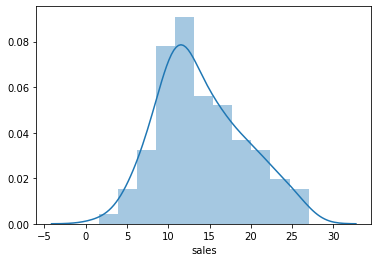

In [11]:
#dependent  variable should follow approximately normal distribution
sns.distplot(Y,hist=True)

In [12]:
"""#log Transformation
import numpy as np
Y_log=np.log(Y)
"""

'#log Transformation\nimport numpy as np\nY_log=np.log(Y)\n'

In [13]:
#sns.display(Y_Log,hist=True

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD72A06A20>,
      dtype=object)

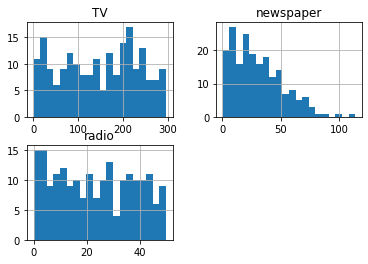

In [14]:
X.hist(bins=20)

In [15]:
from scipy.stats import skew
data_num_skew = X.apply(lambda x: skew(x.dropna()))
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewnes over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


E:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD72BC6AC8>,
      dtype=object)

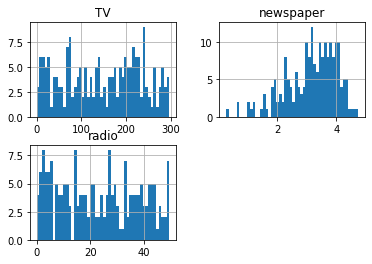

In [16]:
X.hist(bins=50)

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


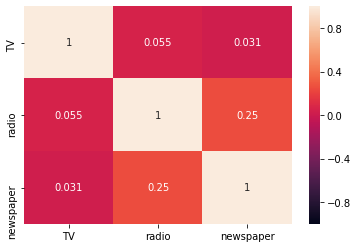

In [17]:
#correlation matrix and Variance inflation factor
import seaborn as sns

corr_df=X.corr(method="pearson")
print(corr_df)
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [19]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [20]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)

print(lm.intercept_)
print(lm.coef_)

3.3532913858151474
[ 0.0437425   0.19303708 -0.04895137]


In [21]:
#pair the feature names with the coefficients
print(list(zip(X.columns,lm.coef_)))

[('TV', 0.04374250157742166), ('radio', 0.1930370789734531), ('newspaper', -0.048951368222487836)]


In [22]:
x1=100
x2=100
x3=100
y_pred=3.3966651774922703+(0.043725008390545134*x1)+(0.19268458601308622*x2)+(-0.21540784321024858*x3)
print(y_pred)

5.496840296830548


In [23]:
print(X_test)

        TV  radio  newspaper
60   210.7   29.5   2.332144
6      8.7   48.9   4.330733
21   218.4   27.7   3.996364
199  283.6   42.0   4.207673
53   216.4   41.7   3.703768
20   147.3   23.9   3.000720
163  188.4   18.1   3.280911
56   198.9   49.4   4.110874
70   216.8   43.9   3.339322
3     17.2   45.9   4.252772
99   289.7   42.3   3.955082
11    66.1    5.8   3.226844
76    16.9   43.7   4.504244
143  220.5   33.2   3.660994
125  229.5   32.3   4.320151
64   102.7   29.6   2.240710
110  255.4   26.9   1.871802
79     5.4   29.9   2.341806
112  241.7   38.0   3.186353
186  205.0   45.1   3.025291
155  187.8   21.1   2.351375
131    0.7   39.6   2.272126
62   261.3   42.7   4.019980
88   110.7   40.6   4.162003
103  280.2   10.1   3.109061
122   18.8   21.7   3.939638
137   25.6   39.0   2.332144
2     44.5   39.3   3.830813
48   239.9   41.5   2.970414
173   19.6   20.1   2.890372
160  131.7   18.4   3.572346
40   228.0   37.7   3.496508
77    27.5    1.6   3.077312
92    28.6    

In [24]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [25]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
print(new_df)

        TV  radio  newspaper  Actual sales  Predicted sales
60   210.7   29.5   2.332144          18.4        18.150269
6      8.7   48.9   4.330733           7.2        12.961369
21   218.4   27.7   3.996364          18.0        18.058153
199  283.6   42.0   4.207673          25.5        23.660251
53   216.4   41.7   3.703768          22.6        20.687510
20   147.3   23.9   3.000720          14.6        14.263259
163  188.4   18.1   3.280911          14.9        14.927745
56   198.9   49.4   4.110874          23.7        21.388474
70   216.8   43.9   3.339322          22.3        21.147529
3     17.2   45.9   4.252772           9.3        12.757885
99   289.7   42.3   3.955082          25.4        23.997356
11    66.1    5.8   3.226844           8.6         7.206327
76    16.9   43.7   4.504244           8.7        12.307771
143  220.5   33.2   3.660994          20.1        19.228133
125  229.5   32.3   4.320151          19.7        19.415816
64   102.7   29.6   2.240710          14

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [26]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.834801071903532
2.59297691109306
0.8322725168816474


In [28]:
import statsmodels.formula.api as sm
#create a fitted model with all three features
lm_model=sm.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

#print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           1.58e-96
Time:                        11:09:35   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [30]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2score=r2_score(Y_test,Y_pred_new)
print(r2score)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8440673582672389
2.519205265731173
0.8322725168816474


In [33]:
import statsmodels.formula.api as sm
#create a fitted model with all three features
lm_model=sm.ols(formula='sales ~ TV + radio', data=data).fit()

#print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    2.921100
TV           0.045755
radio        0.187994
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           4.83e-98
Time:                        11:28:28   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [35]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2score=r2_score(Y_test,Y_pred_new)
print(r2score)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8447042383736406
2.5140553711662093
0.8322725168816474


Text(0, 0.5, 'Residuals')

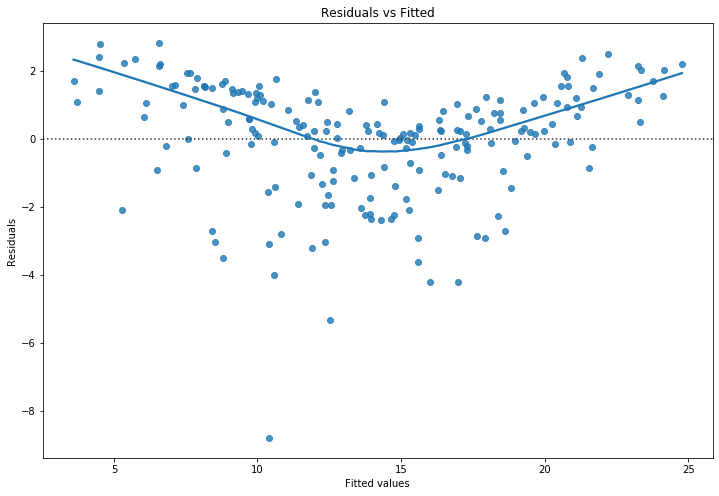

In [37]:
#errors should be random - residulas means errors - check with the help of residulas v/s fitted plots
#no cyclic pattern should be seen in the graphs.
#error should follow normal distribution
#error points should fall on or close to red diagonal line
#check using scale location plot 


plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sales', data=data, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')



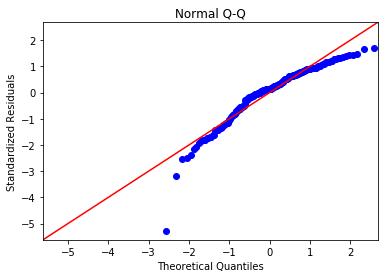

In [43]:
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals');
plt.show()

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

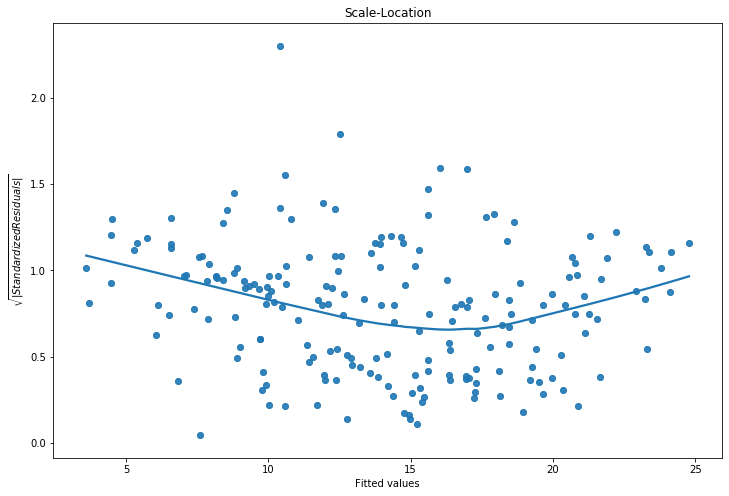

In [45]:


# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')


In [46]:
from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

 

from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)


3.3522471725966003
[ 0.04374234  0.19302603 -0.04853131]
3.3367940582203186
[ 0.04362374  0.18766033 -0.        ]
